<h3>Using symbolic variable</h3>

<class 'sympy.matrices.dense.MutableDenseMatrix'>


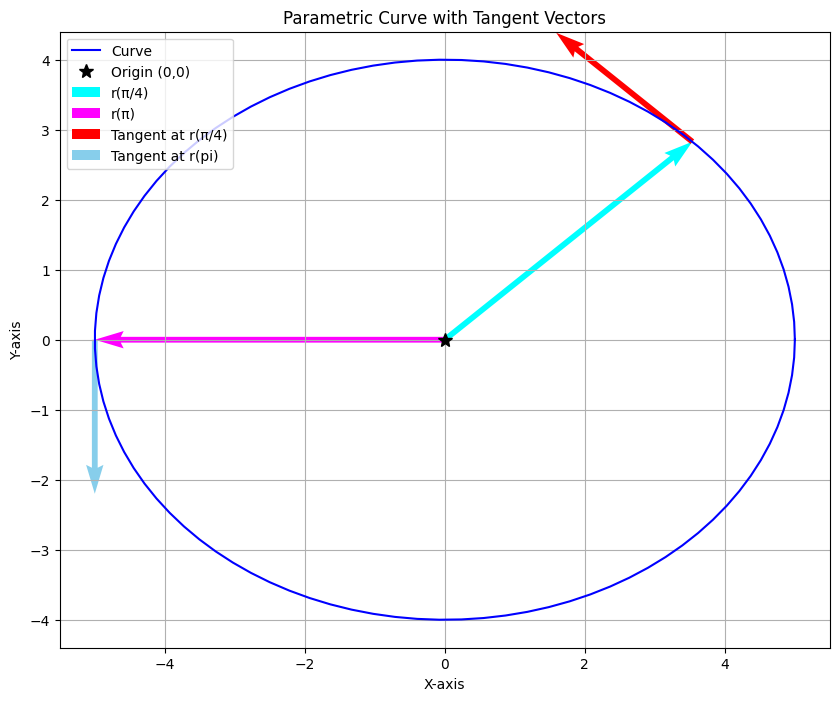

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

t = sp.symbols('t')
r = sp.Matrix([5*sp.cos(t), 4*sp.sin(t)])

# Position vectors
r1 = r.subs(t, np.pi/4).evalf()
r2 = r.subs(t, np.pi).evalf()

#tangent vectors
t1 = sp.diff(r, t).subs(t, np.pi/4).evalf()
t2 = sp.diff(r, t).subs(t, np.pi).evalf()

t_vals = np.linspace(0, 2*np.pi, 100)
r_func = sp.lambdify(t, r, 'numpy')
r_vals = np.array([r_func(t) for t in t_vals])

# Plot 
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(r_vals[:, 0], r_vals[:, 1], label='Curve', color='blue')
ax.plot(0, 0, 'k*', label = 'Origin (0,0)', markersize = 10)
ax.quiver(0, 0, float(r1[0]), float(r1[1]),
          scale=1, color='cyan', label='r(π/4)', linewidth=2, scale_units='xy', angles='xy')
ax.quiver(0, 0, float(r2[0]), float(r2[1]),
          scale=1, color='magenta', label='r(π)', linewidth=2, scale_units='xy', angles='xy')
ax.quiver(float(r1[0]), float(r1[1]), float(t1[0]), float(t1[1]),
        scale=20, color='red', label='Tangent at r(π/4)')
ax.quiver(float(r2[0]), float(r2[1]), float(t2[0]), float(t2[1]), scale = 20, label = 'Tangent at r(pi)',
           color = 'skyblue')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Parametric Curve with Tangent Vectors')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.legend(loc = 'upper left')
plt.show()


<h3>Using numpy arrays</h3>

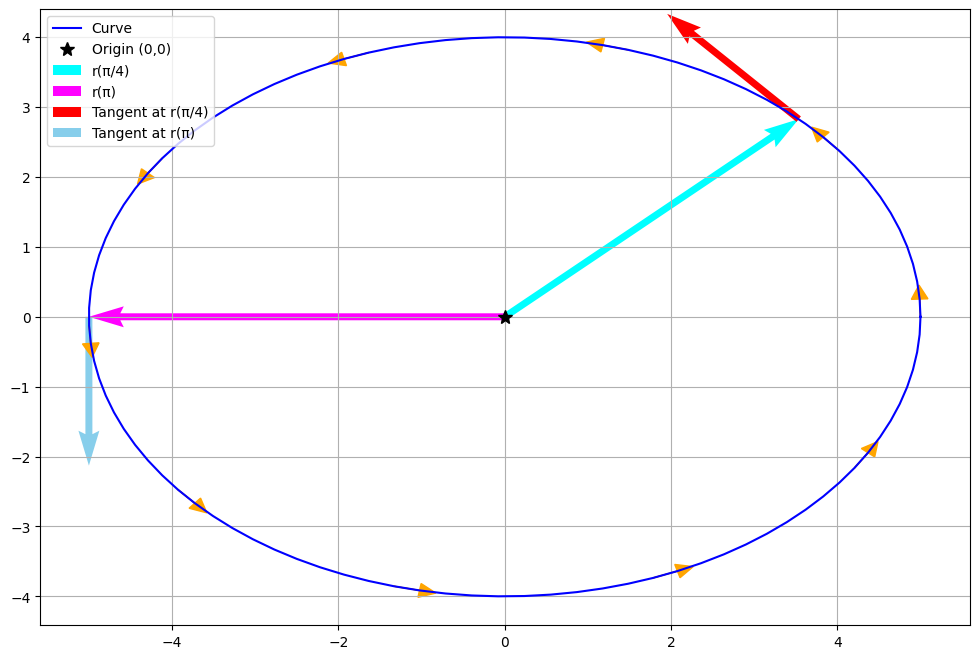

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

t = np.linspace(0, 2*np.pi, 100)
r = np.array([5*np.cos(t), 4*np.sin(t)])

# position vectors
pos1 = np.array([5*np.cos(np.pi/4), 4*np.sin(np.pi/4)])
pos2 = np.array([5*np.cos(np.pi), 4*np.sin(np.pi)])
# tangent vectors
tangent1 = np.array([-5*np.sin(np.pi/4), 4*np.cos(np.pi/4)])
tangent2 = np.array([-5*np.sin(np.pi), 4*np.cos(np.pi)])


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(r[0], r[1], label= "Curve", color = 'blue')
ax.plot(0,0, 'k*', label = 'Origin (0,0)', markersize = 10)
ax.quiver(0, 0, pos1[0], pos1[1], scale=1, color='cyan', label='r(π/4)', linewidth=2, scale_units='xy', angles='xy')
ax.quiver(0, 0, pos2[0], pos2[1],   scale=1, color='magenta', label='r(π)', linewidth=1, scale_units='xy', angles='xy')
ax.quiver(pos1[0], pos1[1], tangent1[0], tangent1[1],
          scale=25, color='red', label='Tangent at r(π/4)')
ax.quiver(pos2[0], pos2[1], tangent2[0], tangent2[1], scale = 25, label = 'Tangent at r(π)', color = 'skyblue')

arrow_idx = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
for i in arrow_idx:
    plt.arrow(r[0][i],r[1][i],(r[0][i+1]-r[0][i]),(r[1][i+1]-r[1][i]),fc='orange',ec='orange',head_width=0.2,head_length=0.2)
    # r[0] = x
    # r[1] = y
plt.grid()
plt.legend(loc = 'upper left')
plt.show()

The arc length parameterization s(t) = sqrt(2)*t
The circular helix  = Matrix([[cos(sqrt(2)*s/2)], [sin(sqrt(2)*s/2)], [sqrt(2)*s/2]])


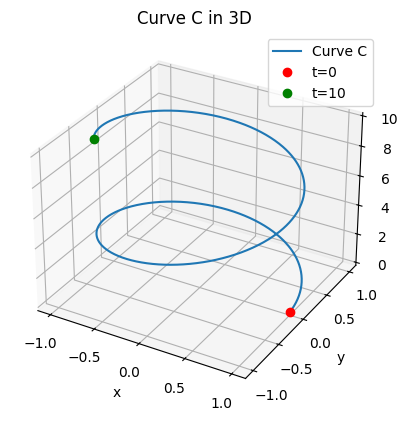

In [111]:
t = sp.symbols('t', real=True)
u = sp.symbols('u', real=True)
r = sp.Matrix([sp.cos(t),sp.sin(t), t])
tangent = sp.diff(r,t)
s = sp.integrate(tangent.norm(), (t, 0, u)).simplify()
print(f'The arc length parameterization s(t) = {s.subs(u, t)}')

u = sp.solve(sp.symbols('s', real=True) - s, u)[0]
print(f'The circular helix  = {r.subs(t, u)}')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
t = np.linspace(0,10,1000)
x = np.cos(t)
y = np.sin(t)
z = t

ax.plot(x,y,z,label='Curve C')
ax.plot(x[0],y[0],z[0],'ro',label='t=0')
ax.plot(x[-1],y[-1],z[-1],'go',label='t=10')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Curve C in 3D')
plt.show()